In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
pip install -U assemblyai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 736.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import assemblyai as aai

aai.settings.api_key = f"156b2416dcfa44f79a545960ec10194f"

In [4]:
transcriber = aai.Transcriber()
transcript = transcriber.transcribe("/kaggle/input/angry-customer/customer call angry.mp3" )

In [5]:
print(transcript.text)

Thank you for calling Questran. This is Claire. How may I help you today? I still have not received my order. You said I would receive it on the 20th. On the 22nd. Still nothing. I don't know what's going on, but if it's not too much of a bother to you, I would really, really now love to get what I paid for. You know what I mean? Okay. May I have the order number and your first name? 498. 4977. Tabitha ratched. Thank you. Let me just check that here. I mean, it's ridiculous. If there's a delay, you could just tell me. It's not like you don't have my email or anything. You didn't notify me at all. If I forgot that I'd ordered it, which, by the way, happens sometimes, then I'd completely be paying for nothing. One moment, please, while I check your order status. Unbelievable. Are you even listening to me? I am. That's why I'm gonna check the status for you. Okay? Okay, fine. Go ahead. Thank you. Let me see. Okay, according to the FedEx note here, your parcel was delivered on the 20th at 

In [6]:
config = aai.TranscriptionConfig(speaker_labels=True)
transcriber = aai.Transcriber(config=config)
transcript = transcriber.transcribe("/kaggle/input/angry-customer/customer call angry.mp3")

In [7]:
utterances = transcript.utterances

for utterance in utterances:
  speaker = utterance.speaker
  text = utterance.text
  print(f"Speaker {speaker}: {text}")

Speaker A: Thank you for calling Questran. This is Claire. How may I help you today?
Speaker B: I still have not received my order. You said I would receive it on the 20th. On the 22nd. Still nothing. I don't know what's going on, but if it's not too much of a bother to you, I would really, really now love to get what I paid for. You know what I mean? Okay.
Speaker A: May I have the order number and your first name?
Speaker B: 498. 4977. Tabitha ratched.
Speaker A: Thank you. Let me just check that here.
Speaker B: I mean, it's ridiculous. If there's a delay, you could just tell me. It's not like you don't have my email or anything. You didn't notify me at all. If I forgot that I'd ordered it, which, by the way, happens sometimes, then I'd completely be paying for nothing.
Speaker A: One moment, please, while I check your order status.
Speaker B: Unbelievable. Are you even listening to me?
Speaker A: I am. That's why I'm gonna check the status for you.
Speaker B: Okay? Okay, fine. Go a

In [8]:
speakers_list = []
text_list = []
sentence_list = []

sentence_splitter = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')

for utterance in utterances:
    speaker = utterance.speaker
    text = utterance.text
    sentences = sentence_splitter.split(text)
    for sentence in sentences:
        speakers_list.append(speaker)
        text_list.append(text)
        sentence_list.append(sentence)

df = pd.DataFrame({
    'Speaker': speakers_list,
    'Sentence': sentence_list
})

print(df.head())


  Speaker                                  Sentence
0       A           Thank you for calling Questran.
1       A                           This is Claire.
2       A                 How may I help you today?
3       B       I still have not received my order.
4       B  You said I would receive it on the 20th.


In [9]:
df.head(30)

,Speaker,Sentence
0,A,Thank you for calling Questran.
1,A,This is Claire.
2,A,How may I help you today?
3,B,I still have not received my order.
4,B,You said I would receive it on the 20th.
5,B,On the 22nd.
6,B,Still nothing.
7,B,"I don't know what's going on, but if it's not ..."
8,B,You know what I mean?
9,B,Okay.


In [10]:
from transformers import pipeline
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
sentiment_pipeline = pipeline("sentiment-analysis")

sentiment_label_list = []
confidence_list = []

for sentence in df['Sentence']:
    result = sentiment_pipeline(sentence)
    sentiment_label = result[0]['label']
    confidence = result[0]['score']
    sentiment_label_list.append(sentiment_label)
    confidence_list.append(confidence)

df['Sentiment'] = sentiment_label_list
df['Confidence'] = confidence_list

print(df.head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  Speaker                                  Sentence Sentiment  Confidence
0       A           Thank you for calling Questran.  POSITIVE    0.999778
1       A                           This is Claire.  POSITIVE    0.999204
2       A                 How may I help you today?  NEGATIVE    0.754514
3       B       I still have not received my order.  NEGATIVE    0.999462
4       B  You said I would receive it on the 20th.  POSITIVE    0.998317


In [12]:
df

,Speaker,Sentence,Sentiment,Confidence
0,A,Thank you for calling Questran.,POSITIVE,0.999778
1,A,This is Claire.,POSITIVE,0.999204
2,A,How may I help you today?,NEGATIVE,0.754514
3,B,I still have not received my order.,NEGATIVE,0.999462
4,B,You said I would receive it on the 20th.,POSITIVE,0.998317
...,...,...,...,...
63,A,This is a standard protocol.,POSITIVE,0.791599
64,A,We have to make sure that the receiver has che...,NEGATIVE,0.998667
65,B,"I know, but do your job right.",POSITIVE,0.999790
66,B,You're not even trying.,NEGATIVE,0.998321


In [13]:
df['Speaker'] = df['Speaker'].replace({'A': 'Customer', 'B': 'Agent'})

In [14]:
df

,Speaker,Sentence,Sentiment,Confidence
0,Customer,Thank you for calling Questran.,POSITIVE,0.999778
1,Customer,This is Claire.,POSITIVE,0.999204
2,Customer,How may I help you today?,NEGATIVE,0.754514
3,Agent,I still have not received my order.,NEGATIVE,0.999462
4,Agent,You said I would receive it on the 20th.,POSITIVE,0.998317
...,...,...,...,...
63,Customer,This is a standard protocol.,POSITIVE,0.791599
64,Customer,We have to make sure that the receiver has che...,NEGATIVE,0.998667
65,Agent,"I know, but do your job right.",POSITIVE,0.999790
66,Agent,You're not even trying.,NEGATIVE,0.998321


In [15]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [16]:
df

,Speaker,Sentence,Sentiment,Confidence
0,Customer,Thank you for calling Questran.,POSITIVE,0.999778
1,Customer,This is Claire.,POSITIVE,0.999204
2,Customer,How may I help you today?,NEGATIVE,0.754514
3,Agent,I still have not received my order.,NEGATIVE,0.999462
4,Agent,You said I would receive it on the 20th.,POSITIVE,0.998317
5,Agent,On the 22nd.,POSITIVE,0.988814
6,Agent,Still nothing.,NEGATIVE,0.998552
7,Agent,"I don't know what's going on, but if it's not ...",POSITIVE,0.995491
8,Agent,You know what I mean?,NEGATIVE,0.939142
9,Agent,Okay.,POSITIVE,0.999752


In [17]:
df_customer = df[df['Speaker'] == 'Customer'].copy()
df_agent = df[df['Speaker'] == 'Agent'].copy()

df_customer.reset_index(drop=True, inplace=True)
df_agent.reset_index(drop=True, inplace=True)

In [18]:
df_customer

,Speaker,Sentence,Sentiment,Confidence
0,Customer,Thank you for calling Questran.,POSITIVE,0.999778
1,Customer,This is Claire.,POSITIVE,0.999204
2,Customer,How may I help you today?,NEGATIVE,0.754514
3,Customer,May I have the order number and your first name?,NEGATIVE,0.998081
4,Customer,Thank you.,POSITIVE,0.999846
5,Customer,Let me just check that here.,POSITIVE,0.997841
6,Customer,"One moment, please, while I check your order s...",NEGATIVE,0.798192
7,Customer,I am.,POSITIVE,0.999314
8,Customer,That's why I'm gonna check the status for you.,POSITIVE,0.988716
9,Customer,Thank you.,POSITIVE,0.999846


In [19]:
speakers_list = []
text_list = []

for utterance in utterances:
    speaker = utterance.speaker
    text = utterance.text
    speakers_list.append(speaker)
    text_list.append(text)


In [20]:
df = pd.DataFrame({
    'Speaker': speakers_list,
    'Text': text_list
})

In [21]:
df

,Speaker,Text
0,A,Thank you for calling Questran. This is Claire...
1,B,I still have not received my order. You said I...
2,A,May I have the order number and your first name?
3,B,498. 4977. Tabitha ratched.
4,A,Thank you. Let me just check that here.
5,B,"I mean, it's ridiculous. If there's a delay, y..."
6,A,"One moment, please, while I check your order s..."
7,B,Unbelievable. Are you even listening to me?
8,A,I am. That's why I'm gonna check the status fo...
9,B,"Okay? Okay, fine. Go ahead."


In [22]:
sentiment_pipeline = pipeline("sentiment-analysis")

sentiment_label_list = []
confidence_list = []

for sentence in df['Text']:
    result = sentiment_pipeline(sentence)
    sentiment_label = result[0]['label']
    confidence = result[0]['score']
    sentiment_label_list.append(sentiment_label)
    confidence_list.append(confidence)

df['Sentiment'] = sentiment_label_list
df['Confidence'] = confidence_list

print(df.head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  Speaker                                               Text Sentiment  \
0       A  Thank you for calling Questran. This is Claire...  POSITIVE   
1       B  I still have not received my order. You said I...  NEGATIVE   
2       A   May I have the order number and your first name?  NEGATIVE   
3       B                        498. 4977. Tabitha ratched.  NEGATIVE   
4       A            Thank you. Let me just check that here.  POSITIVE   

   Confidence  
0    0.998697  
1    0.756611  
2    0.998081  
3    0.986108  
4    0.999795  


In [23]:
df

,Speaker,Text,Sentiment,Confidence
0,A,Thank you for calling Questran. This is Claire...,POSITIVE,0.998697
1,B,I still have not received my order. You said I...,NEGATIVE,0.756611
2,A,May I have the order number and your first name?,NEGATIVE,0.998081
3,B,498. 4977. Tabitha ratched.,NEGATIVE,0.986108
4,A,Thank you. Let me just check that here.,POSITIVE,0.999795
5,B,"I mean, it's ridiculous. If there's a delay, y...",NEGATIVE,0.999228
6,A,"One moment, please, while I check your order s...",NEGATIVE,0.798192
7,B,Unbelievable. Are you even listening to me?,NEGATIVE,0.985161
8,A,I am. That's why I'm gonna check the status fo...,POSITIVE,0.994145
9,B,"Okay? Okay, fine. Go ahead.",POSITIVE,0.999403


In [24]:
df['Speaker'] = df['Speaker'].replace({'A': 'Customer', 'B': 'Agent'})

In [25]:
df_customer = df[df['Speaker'] == 'Customer'].copy()
df_agent = df[df['Speaker'] == 'Agent'].copy()

df_customer.reset_index(drop=True, inplace=True)
df_agent.reset_index(drop=True, inplace=True)

In [26]:
df_customer

,Speaker,Text,Sentiment,Confidence
0,Customer,Thank you for calling Questran. This is Claire...,POSITIVE,0.998697
1,Customer,May I have the order number and your first name?,NEGATIVE,0.998081
2,Customer,Thank you. Let me just check that here.,POSITIVE,0.999795
3,Customer,"One moment, please, while I check your order s...",NEGATIVE,0.798192
4,Customer,I am. That's why I'm gonna check the status fo...,POSITIVE,0.994145
5,Customer,"Thank you. Let me see. Okay, according to the ...",NEGATIVE,0.993426
6,Customer,Have you tried checking with the building's co...,NEGATIVE,0.996887
7,Customer,How about your neighbors? Have you checked wit...,NEGATIVE,0.998535
8,Customer,"No, no, no. I'm not saying that. What I'm sayi...",NEGATIVE,0.997223
9,Customer,"Tabitha, I'm just doing my job. This is a stan...",NEGATIVE,0.984595


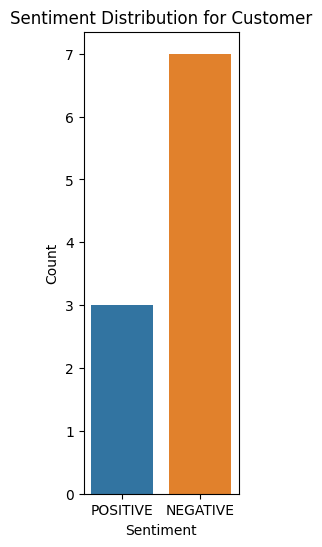

In [27]:
import seaborn as sns
plt.figure(figsize=(2, 6))
sns.countplot(data=df_customer, x='Sentiment', order=['POSITIVE','NEGATIVE'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Customer')
plt.show()

In [28]:
df_customer.loc[df_customer['Sentiment'] == 'NEGATIVE', 'Confidence'] *= -1


In [29]:
df_customer

,Speaker,Text,Sentiment,Confidence
0,Customer,Thank you for calling Questran. This is Claire...,POSITIVE,0.998697
1,Customer,May I have the order number and your first name?,NEGATIVE,-0.998081
2,Customer,Thank you. Let me just check that here.,POSITIVE,0.999795
3,Customer,"One moment, please, while I check your order s...",NEGATIVE,-0.798192
4,Customer,I am. That's why I'm gonna check the status fo...,POSITIVE,0.994145
5,Customer,"Thank you. Let me see. Okay, according to the ...",NEGATIVE,-0.993426
6,Customer,Have you tried checking with the building's co...,NEGATIVE,-0.996887
7,Customer,How about your neighbors? Have you checked wit...,NEGATIVE,-0.998535
8,Customer,"No, no, no. I'm not saying that. What I'm sayi...",NEGATIVE,-0.997223
9,Customer,"Tabitha, I'm just doing my job. This is a stan...",NEGATIVE,-0.984595


Text(0.5, 1.0, 'Sentiment Analysis')

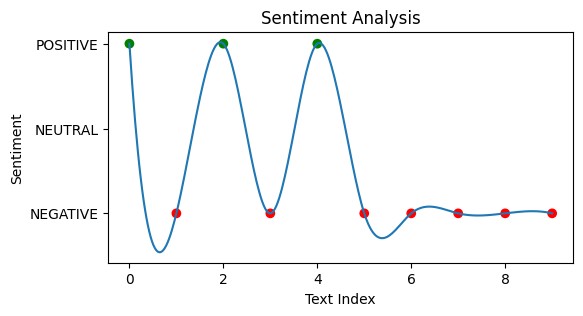

In [30]:
from scipy.interpolate import make_interp_spline
sentiment_mapping = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}
df_customer['Sentiment_Numeric'] = df_customer['Sentiment'].map(sentiment_mapping)
sentiment_smooth = make_interp_spline(range(len(df_customer)), df_customer['Sentiment_Numeric'], k=3)
x_smooth = np.linspace(0, len(df_customer) - 1, 300)
colors = np.where(df_customer['Sentiment_Numeric'] > 0, 'g', 'r')

plt.figure(figsize=(6, 3))
plt.plot(x_smooth, sentiment_smooth(x_smooth), label='Smoothed Sentiment')
plt.scatter(range(len(df_customer)), df_customer['Sentiment_Numeric'], c=colors)
plt.xlabel('Text Index')
plt.ylabel('Sentiment')
plt.yticks([-1, 0, 1], ['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title('Sentiment Analysis')

In [31]:
negative_count = len(df_customer[df_customer['Sentiment'] == 'NEGATIVE'])
positive_count = len(df_customer[df_customer['Sentiment'] == 'POSITIVE'])

percentage_negative_to_positive = (negative_count /(negative_count+positive_count)) * 100

print(f"Percentage of negative texts to positive texts: {percentage_negative_to_positive:.2f}%")

Percentage of negative texts to positive texts: 70.00%


In [39]:
!pip install --upgrade fastapi typing-extensions

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.18.2
    Uninstalling pydantic_core-2.18.2:
      Successfully uninstalled pydantic_core-2.18.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.6.1 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
ydata-profiling 4.3.1 requires pydantic<2,>=1.8.1, but you have pydantic 2.3.0 which is incompatible.
ydata-profiling 4.3.1 requires scipy

In [33]:
!pip install whisper

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 719.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41121 sha256=b7b926023f741a9cff402801a60743081beb1c9133871d19c4ce3dc938490add
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
Successfully built whisper


In [45]:
import whisper
from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline
import torch
import gradio as gr

ImportError: cannot import name 'Doc' from 'typing_extensions' (/opt/conda/lib/python3.10/site-packages/typing_extensions.py)

In [44]:
!pip install fastapi typing-extensions gradio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Can't uninstall 'urllib3'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.31.17 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.2.1 which is incompatible.
distributed 2023.7.1 requires dask==2023.7.1, but you have dask 2023.9.0 which is incompatible.
google-auth 2.20.0 requires urllib3<2.0, but you have urllib3 2.2.1 which is incompatible.
kfp 2.0.1 requ

In [ ]:
sttmodel = whisper.load_model("base")

nlp_model_name = "SamLowe/roberta-base-go_emotions"
nlp_tokenizer = RobertaTokenizer.from_pretrained(nlp_model_name)
nlp_model = RobertaForSequenceClassification.from_pretrained(nlp_model_name)

In [35]:
def analyze_sentiment(text, k):
    inputs = nlp_tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
       logits = nlp_model(**inputs).logits

    probabilities = torch.softmax(logits, dim=1)[0]


    probs = torch.softmax(logits, dim=1)
    class_mapping = nlp_model.config.id2label

    top5_indices = torch.topk(probs, k, dim=1).indices[0].tolist()

    top5_labels = [class_mapping[idx] for idx in top5_indices]
    results = [{"label": label, "score": (probability*100)} for label, probability in zip(top5_labels, probs[0, top5_indices].tolist())]

    return results


In [ ]:

k = 1 
df['emotion'] = df['Text'].apply(lambda x: [result['label'] for result in analyze_sentiment(x, k)])
df['emotion_confidence'] = df['Text'].apply(lambda x: [result['score'] for result in analyze_sentiment(x, k)])



In [ ]:
df

In [ ]:
df['emotion'] = df['emotion'].apply(lambda x: x[0])
df['emotion_confidence'] = df['emotion_confidence'].apply(lambda x: round(x[0], 2))


In [ ]:
df